In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import nltk
nltk.download()
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from sklearn.decomposition import LatentDirichletAllocation
import re
from nltk.stem import WordNetLemmatizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


## Data Preparation

In [2]:
GDP_P=pd.read_csv('Economical_data/GDP_Percent.csv')
PPP=pd.read_csv('Economical_data/PPP.csv')
GDP_C=pd.read_csv('Economical_data/COUNTRY_GDP.csv')
Export=pd.read_csv('Economical_data/EXPORTS.csv')
FER=pd.read_csv('Economical_data/FER.csv')
INFL=pd.read_csv('Economical_data/INFL_RATE.csv')
Invest=pd.read_csv('Economical_data/INVEST.csv')
Import=pd.read_csv('Economical_data/IMPORTS.csv')

In [3]:
#transposing dataframe

GDP_P = GDP_P.T 
PPP = PPP.T
GDP_C = GDP_C.T 
Export = Export.T 
FER = FER.T 
INFL = INFL.T 
Invest = Invest.T 
Import = Import.T 

In [4]:
GDP_P.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
GDP_P = GDP_P.drop('Unnamed: 0')

PPP.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
PPP = PPP.drop('Unnamed: 0')

GDP_C.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
GDP_C = GDP_C.drop('Unnamed: 0')

Export.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Export = Export.drop('Unnamed: 0')

FER.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
FER = FER.drop('Unnamed: 0')

INFL.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
INFL = INFL.drop('Unnamed: 0')

Invest.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Invest = Invest.drop('Unnamed: 0')

Import.columns=['USA','CHINA','INDIA','JAPAN','UK','SWITZERLAND','CANADA','AUSTRALIA','BRAZIL']
Import = Import.drop('Unnamed: 0')

In [5]:
#Creating new Country Column for Main dataset

USA=pd.DataFrame(['USA']*40,columns=['Country'])
CHINA=pd.DataFrame(['CHINA']*40,columns=['Country'])
INDIA=pd.DataFrame(['INDIA']*40,columns=['Country'])
JAPAN=pd.DataFrame(['JAPAN']*40,columns=['Country'])
SWITZERLAND=pd.DataFrame(['SWITZERLAND']*40,columns=['Country'])
CANADA=pd.DataFrame(['CANADA']*40,columns=['Country'])
AUSTRALIA=pd.DataFrame(['AUSTRALIA']*40,columns=['Country'])
BRAZIL=pd.DataFrame(['BRAZIL']*40,columns=['Country'])
UK=pd.DataFrame(['UK']*40,columns=['Country'])


Economical_data=pd.concat([USA,CHINA,INDIA,JAPAN,SWITZERLAND,CANADA,AUSTRALIA,BRAZIL,UK])

In [6]:
#Creating new Year Column for Main dataset

Years=[]
for i in range(len(Import)):
    Years.append(Import.index[i])
    
Years=Years*9
   
Economical_data['Year']=Years

In [7]:
# Creating new Economical Columsns for main dataset

gdp_p=[]
for i in range(40):
    for j in GDP_P.columns:
          gdp_p.append(GDP_P[j][i])
            
Economical_data['GDP_P']=gdp_p 

#######################################################

ppp=[]
for i in range(40):
    for j in GDP_P.columns:
          ppp.append(PPP[j][i])
            
Economical_data['PPP']=ppp

#######################################################

gdp_c=[]
for i in range(40):
    for j in GDP_P.columns:
          gdp_c.append(GDP_C[j][i])
            
Economical_data['GDP_C']=gdp_c

#######################################################

ex=[]
for i in range(40):
    for j in GDP_P.columns:
          ex.append(Export[j][i])
            
Economical_data['Export']=ex

#######################################################

infl=[]
for i in range(40):
    for j in GDP_P.columns:
          infl.append(INFL[j][i])
            
Economical_data['INFL']=infl

#######################################################

inv=[]
for i in range(40):
    for j in GDP_P.columns:
          inv.append(Invest[j][i])
            
Economical_data['Invest']=inv

#######################################################

imp=[]
for i in range(40):
    for j in GDP_P.columns:
          imp.append(Import[j][i])
            
Economical_data['Import']=imp

#######################################################

fer=[]
for i in range(40):
    for j in GDP_P.columns:
          fer.append(FER[j][i])
            
Economical_data['FER']=fer
#######################################################

Economical_data=Economical_data.reset_index()

In [8]:
#Article data does not contain record for year 1980 so removing the rows with 1980

removing_rows=[]
for i in range(len(Economical_data)):
    if Economical_data['Year'][i]=='1980':
        removing_rows.append(i)
        
Economical_data= Economical_data.drop(removing_rows,axis=0)

In [39]:
# Article cleaning for one dataset --(trying)

stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)

data=pd.read_csv('articles/articles_1981.csv')    
string='articles_1981.csv'

date=int(string[9:13])
date

data['date']=date

In [40]:
#Function for cleaning article

def lem(data):
    final_corpus = []
    stemmer = LancasterStemmer()

    for i in range(len(data)):
        word = word_tokenize(data['article'][i].lower())
        word = [stemmer.stem(y) for y in word if y not in stuff_to_be_removed]
        word =' '.join(word)
        word =re.sub("[^-9A-Za-z ]", "" , word)
        
        
        data['article'][i]=word
    return data

In [41]:
data=lem(data)
article=data[['date','article']]
final_data=article

In [43]:
# reading all the csv and cleaning it

main='/Users/ishanishah/Documents/Technocolab Software/Project/articles'

for class_name in os.listdir(main):
    if class_name!='articles_1981.csv' and class_name.startswith('a'):
        print(class_name)
        data=pd.read_csv('/Users/ishanishah/Documents/Technocolab Software/Project/articles/'+class_name)
        date=int(class_name[9:13])
        data['date']=date
        data['article']=data['article'].astype(str)
        data=lem(data)
        article=data[['date','article']]
        final_data=pd.concat([final_data,article],axis=0)

articles_2016.csv
articles_2002.csv
articles_2003.csv
articles_2017.csv
articles_2001.csv
articles_2015.csv
articles_2014.csv
articles_2000.csv
articles_2004.csv
articles_2010.csv
articles_2011.csv
articles_2005.csv
articles_2013.csv
articles_2007.csv
articles_2006.csv
articles_2012.csv
articles_1999.csv
articles_1998.csv
articles_1988.csv
articles_1989.csv
articles_1987.csv
articles_1993.csv
articles_1992.csv
articles_1986.csv
articles_1990.csv
articles_1984.csv
articles_1985.csv
articles_1991.csv
articles_1995.csv
articles_1994.csv
articles_1982.csv
articles_1996.csv
articles_1997.csv
articles_1983.csv
articles_2008.csv
articles_2009.csv
articles_2019.csv
articles_2018.csv


In [92]:
#Saving cleaned data into Dataframe

#final_data.to_csv('FINAL_DATA.csv')

FINAL_DATA=pd.read_csv('FINAL_DATA.csv')
FINAL_DATA=FINAL_DATA.dropna()

FINAL=FINAL_DATA.drop('Unnamed: 0',axis=1)

In [93]:
#Converting article columns into Vectors

stop_words=set(nltk.corpus.stopwords.words('english'))
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
tfidf_vect=vect.fit_transform(FINAL['article'])


#finding least and most word from vector

idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)

In [46]:
#Using LDA getting top 3 most discussed topic

lda_model=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=42,max_iter=1) 

lda=lda_model.fit_transform(tfidf_vect)

In [47]:
#finding Percentage of discussed topic

for i,topic in enumerate(lda[0]):
      print("Topic ",i,": ",topic*100,"%")

Topic  0 :  63.38394957944181 %
Topic  1 :  5.785222381350021 %
Topic  2 :  30.830828039208168 %


In [48]:
print(lda_model.components_)

[[9.70416048e+02 8.46977339e+02 9.82838337e+02 ... 3.19611223e+01
  4.53834832e+02 1.46543203e+03]
 [5.20118204e+03 3.43339137e-01 9.14616135e-01 ... 1.10073670e+03
  8.14386462e+01 3.39170322e-01]
 [1.36103228e+03 1.50187929e+03 6.49256015e+02 ... 4.33884879e+02
  5.59325475e+03 8.20377832e+02]]


In [49]:
#printing top 10 words from each topic

vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
mr said govern stat country chin trump min polit peopl 

Topic 1: 
shar net qtr int report earn company 99 sal loss 

Topic 2: 
said company mr new bank invest mil perc market year 



In [50]:
#Creating new dataframe for top 3 topics

time_stamp_df = FINAL['date']

lda_top_df = pd.DataFrame(lda)

ARTICLE=pd.concat([time_stamp_df,lda_top_df],axis=1)

ARTICLE=ARTICLE.dropna()

ARTICLE['date']=ARTICLE['date'].astype(int)

ARTICLE=ARTICLE.rename(columns = {'date': 'Year', 0: 'Topic-1',1:'Topic-2',2:'Topic-3'}, inplace = False)

temp=ARTICLE.filter(['Topic-1','Topic-2','Topic-3'],axis=1) #extracting columns

temp=temp.astype(float)

ARTICLE['Mapping'] = temp.idxmax(axis=1) 

#counting the number of topics in each year

summary = ARTICLE.groupby('Year')['Mapping'].value_counts()

In [51]:
summary.to_csv('summary.csv')

summary=pd.read_csv('summary.csv')

In [52]:
summary.columns = ['Year', 'Mapping', 'SUM']
summary.head()

,Year,Mapping,SUM
0,1981,Topic-3,4011
1,1981,Topic-1,2889
2,1981,Topic-2,2297
3,1982,Topic-3,2597
4,1982,Topic-1,1158


In [81]:
#Creating Pivot table for better summarization

summary1 = pd.pivot_table(data=summary, index=['Year'], columns=['Mapping'], values='SUM')

In [55]:
#Scaling above data 

summary1['Total'] = summary1['Topic-1'] + summary1['Topic-2'] + summary1['Topic-3'] 

summary1['Topic-1'] = summary1['Topic-1']/summary1['Total']
summary1['Topic-2'] = summary1['Topic-2']/summary1['Total']
summary1['Topic-3'] = summary1['Topic-3']/summary1['Total']


summary1 = summary1.filter(['Year', 'Topic-1', 'Topic-2', 'Topic-3'])
summary1 = summary1.astype(float)

In [56]:
#Creating Year Column for main data

summary1=summary1.fillna(0)

years=[]
for i in Economical_data.iloc[:39,2]:
    years.append(i)
    
summary1['Years']=years

In [57]:
#creating article data in size of economical data

tp=summary1

for i in range(8):
    tp=pd.concat([tp,summary1])

In [58]:
#creating columns in Economical data for Article topics

topic1=tp['Topic-1'].to_list()
Economical_data['Topic-1']=topic1

topic2=tp['Topic-2'].to_list()
Economical_data['Topic-2']=topic2

topic3=tp['Topic-3'].to_list()
Economical_data['Topic-3']=topic3

MAIN=Economical_data.drop('index',axis=1)

In [60]:
MAIN.to_csv('Main_data.csv')

## Data Cleaning

In [61]:
df=pd.read_csv('Main_data.csv')

In [62]:
df=df.drop('Unnamed: 0',axis=1)

In [63]:
df.head()

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3
0,USA,1981,7.910,1.497000,194.804722,NaN,2.500000,35.476,NaN,1.498386,0.314124,0.249755,0.436120
1,USA,1982,5.281,3.664000,266.577848,1.423,11.346060,19.169,14.044,7.862945,0.289572,0.061015,0.649412
2,USA,1983,3.181,243.360647,9465.379714,8.834,7.778582,33.912,-16.650,226.740833,0.225028,0.183148,0.591824
3,USA,1984,-2.028,0.507410,10032.062100,0.927,17.965930,19.030,-5.344,0.430295,0.270568,0.333333,0.396099
4,USA,1985,5.110,2.019661,18832.196720,6.969,4.022499,32.129,8.905,1.675708,0.299037,0.252532,0.448431


In [64]:
#Checking for null values

df.isnull().sum()

Country     0
Year        0
GDP_P       0
PPP         0
GDP_C       2
Export     18
INFL        0
Invest      0
Import     18
FER         0
Topic-1     0
Topic-2     0
Topic-3     0
dtype: int64

In [65]:
#Counting percentage of null values

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Country    0.000000
Year       0.000000
GDP_P      0.000000
PPP        0.000000
GDP_C      0.569801
Export     5.128205
INFL       0.000000
Invest     0.000000
Import     5.128205
FER        0.000000
Topic-1    0.000000
Topic-2    0.000000
Topic-3    0.000000
dtype: float64

In [66]:
#diving data into categorical and numerical 

cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

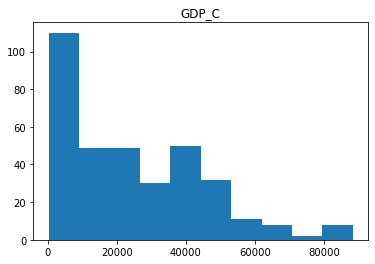

-----------------------------------------------------------


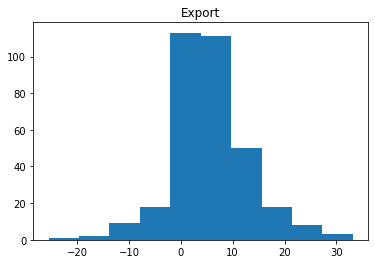

-----------------------------------------------------------


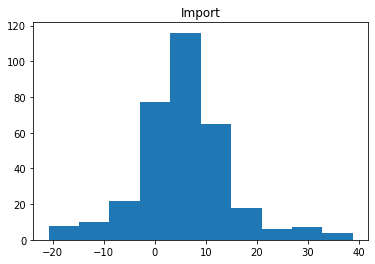

-----------------------------------------------------------


In [67]:
#Checking for skewness of data so accordingly we can replace Null values

Numeric=df.loc[:,num]
for i in num:
    if Numeric[i].isnull().sum()>0:
        
        plt.title(i)
    
        plt.hist(Numeric[i])

        plt.show()

        print('-----------------------------------------------------------') 

In [68]:
#Replacing null values

df['GDP_C'].fillna((df['GDP_C'].median()), inplace=True)
df['Export'].fillna((df['Export'].mean()), inplace=True)
df['Import'].fillna((df['Import'].mean()), inplace=True)

<AxesSubplot:>

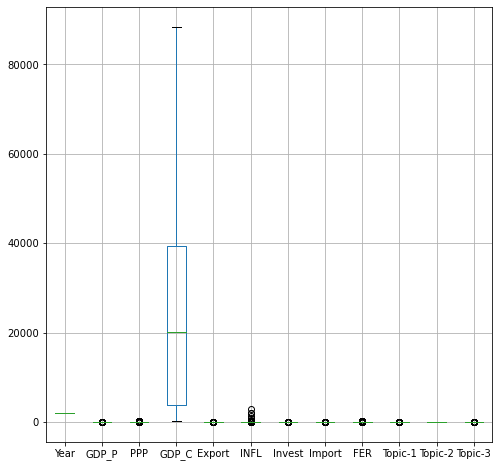

In [69]:
#Checking for outliers

df.boxplot(figsize=(8,8))

In [70]:
#Handling outliers 

for i in df.columns:
    if df[i].dtype!='object':
        q1 = df[i].quantile(.25)
        q3 = df[i].quantile(.75)
        IQR = q3 - q1
        df[i]= np.clip(df[i], q1 - 1.5 *IQR, q3 + 1.5 * IQR)

In [71]:
#As we know our Numerical data is not normal so we are normalising it here

from sklearn import preprocessing

x=df.iloc[:,2:]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [72]:
df['GDP_P']=x_scaled['GDP_P']
df['PPP']=x_scaled['PPP']
df['GDP_C']=x_scaled['GDP_C']
df['Export']=x_scaled['Export']
df['INFL']=x_scaled['INFL']
df['Invest']=x_scaled['Invest']
df['Import']=x_scaled['Import']
df['FER']=x_scaled['FER']
df['Topic-1']=x_scaled['Topic-1']
df['Topic-2']=x_scaled['Topic-2']
df['Topic-3']=x_scaled['Topic-3']

<AxesSubplot:>

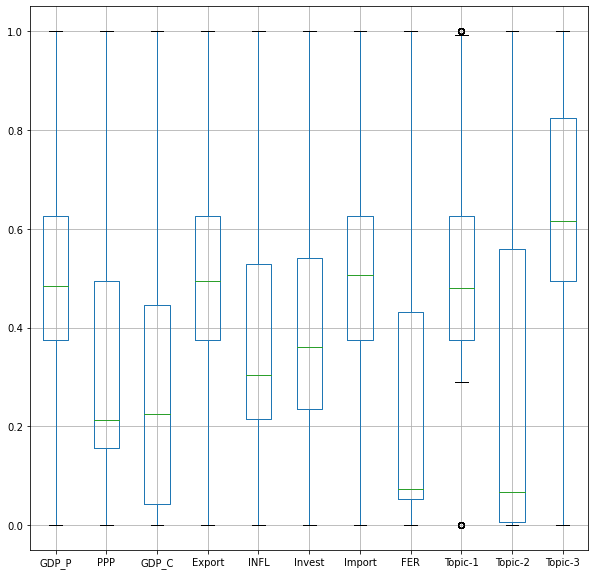

In [73]:
#Plotting Normalise data

df.iloc[:,2:].boxplot(figsize=(10,10))

In [74]:
#Converting Categorical data into Numerical Data using label encoder 

from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
df['Country']= label_encoder.fit_transform(df['Country'])

In [75]:
df=df.sort_values('Year')
df=df.reset_index()
df=df.drop('index',axis=1)

In [76]:
#Diving the data into Train and Test according to the given task

for i in range(len(df)):
    if df['Year'][i]==2006:
        Train=df.iloc[:i,:]
        Test=df.iloc[i:,:]
        break

In [77]:
Train.tail()

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3
220,8,2005,0.248697,0.163451,0.142503,0.410035,0.912340,0.471789,0.479962,0.051646,0.876394,0.020673,0.678385
221,1,2005,0.477660,0.258255,0.137218,0.416157,0.544057,0.285122,0.587403,0.112950,0.876394,0.020673,0.678385
222,4,2005,0.081564,0.194226,0.244540,0.372648,0.502671,0.189990,0.398908,0.060021,0.876394,0.020673,0.678385
223,3,2005,0.552166,0.775669,0.001651,0.521918,0.729849,0.288876,0.293931,0.679007,0.876394,0.020673,0.678385
224,5,2005,1.000000,0.446101,0.005833,0.509482,0.693995,0.928094,0.506675,0.435550,0.876394,0.020673,0.678385


In [78]:
Test.head()

,Country,Year,GDP_P,PPP,GDP_C,Export,INFL,Invest,Import,FER,Topic-1,Topic-2,Topic-3
225,4,2006,0.165325,0.211552,0.211137,0.836057,0.327442,0.325239,0.290685,0.067251,0.569275,0.006414,0.872954
226,0,2006,0.070520,0.230417,0.790433,0.000000,0.065789,0.461075,0.145106,0.057004,0.569275,0.006414,0.872954
227,3,2006,0.611740,1.000000,0.232943,0.315237,0.109192,0.642737,0.562849,1.000000,0.569275,0.006414,0.872954
228,1,2006,0.440251,0.156891,0.621601,0.472911,0.216227,0.247234,0.498445,0.052386,0.569275,0.006414,0.872954
229,2,2006,1.000000,0.443651,0.017667,1.000000,0.228947,1.000000,0.717835,0.429271,0.569275,0.006414,0.872954
